In [2]:
from google.colab import files                   # since data was taken from kaggle, hence kaggle token used
import os
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download --force -d sudalairajkumar/covid19-in-india

-rw-r--r-- 1 root root 67 May  8 10:30 kaggle.json
  0% 0.00/188k [00:00<?, ?B/s]
100% 188k/188k [00:00<00:00, 72.5MB/s]


In [4]:
!unzip covid19-in-india.zip                            # covid19-in-india.zip has been pushed seperately in the repo

Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [0]:
import pandas as pd
import numpy as np
import datetime
raw_data = pd.read_csv('covid_19_india.csv')

In [6]:
x = np.array(raw_data['Time'])
u = np.unique(x)
print(u)
x[x == '10:00 AM'] = '10:00:00'                                                                                 # replacing the AM-PM timestyle with 24 hour timestyle
raw_data['Time'][raw_data['Time'] == '10:00 AM'] = '10:00:00' 
u = np.unique(raw_data['Time'])
print(u)
print(raw_data['Time'])

['10:00 AM' '5:00 PM' '6:00 PM' '7:30 PM' '8:00 AM' '8:30 PM' '9:30 PM']
['10:00:00' '5:00 PM' '6:00 PM' '7:30 PM' '8:00 AM' '8:30 PM' '9:30 PM']
0       6:00 PM
1       6:00 PM
2       6:00 PM
3       6:00 PM
4       6:00 PM
         ...   
1732    8:00 AM
1733    8:00 AM
1734    8:00 AM
1735    8:00 AM
1736    8:00 AM
Name: Time, Length: 1737, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
raw_data['Time'][raw_data['Time'] == '10:00 AM'] = '10:00:00' 
raw_data['Time'][raw_data['Time'] == '8:00 AM'] = '08:00:00'
raw_data['Time'][raw_data['Time'] == '5:00 PM'] = '17:00:00'                                     # replacing the AM-PM timestyle with 24 hour timestyle
raw_data['Time'][raw_data['Time'] == '6:00 PM'] = '18:00:00'
raw_data['Time'][raw_data['Time'] == '7:30 PM'] = '19:30:00'
raw_data['Time'][raw_data['Time'] == '8:30 PM'] = '20:30:00'
raw_data['Time'][raw_data['Time'] == '9:30 PM'] = '21:30:00'     
print(raw_data['Time'])

0       18:00:00
1       18:00:00
2       18:00:00
3       18:00:00
4       18:00:00
          ...   
1732    08:00:00
1733    08:00:00
1734    08:00:00
1735    08:00:00
1736    08:00:00
Name: Time, Length: 1737, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [0]:
raw_data['Date'] = raw_data['Date'] + '20'
print(raw_data['Date'])
raw_data['Datetime'] = raw_data['Date'] + ' ' + raw_data['Time']
for i in range(len(raw_data['Datetime'])):
  raw_data['Datetime'][i] = datetime.datetime.strptime(raw_data['Datetime'][i],'%d/%m/%Y %H:%M:%S')              # converting all the dates in string to datetime data type

In [11]:
print(raw_data['Datetime'])

0       2020-01-30 18:00:00
1       2020-01-31 18:00:00
2       2020-02-01 18:00:00
3       2020-02-02 18:00:00
4       2020-02-03 18:00:00
               ...         
1732    2020-05-08 08:00:00
1733    2020-05-08 08:00:00
1734    2020-05-08 08:00:00
1735    2020-05-08 08:00:00
1736    2020-05-08 08:00:00
Name: Datetime, Length: 1737, dtype: object


In [12]:
from matplotlib import pyplot as plt
print(raw_data.columns)                                                         # we shall be predicting the confirmed cases for the next week 

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed', 'Datetime'],
      dtype='object')


In [13]:
statewise = raw_data.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max()
statewise['Active'] = statewise['Confirmed'] - statewise['Deaths'] - statewise['Cured']
print(statewise)                                                                # displaying statewise statistics as they stand for better understanding

                             Confirmed  Deaths  Cured  Active
State/UnionTerritory                                         
Andaman and Nicobar Islands         33       0     33       0
Andhra Pradesh                    1847      38    780    1029
Arunachal Pradesh                    1       0      1       0
Assam                               54       1     34      19
Bihar                              550       5    246     299
Chandigarh                         135       1     21     113
Chhattisgarh                        59       0     38      21
Dadar Nagar Haveli                   1       0      0       1
Delhi                             5980      66   1931    3983
Goa                                  7       0      7       0
Gujarat                           7012     425   1709    4878
Haryana                            625       7    260     358
Himachal Pradesh                    46       2     38       6
Jammu and Kashmir                  793       9    335     449
Jharkhan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [14]:
country_data = raw_data.groupby("Datetime")[["Confirmed","Cured","Deaths"]].sum().reset_index()
country_data['Active'] = country_data['Confirmed'] - country_data['Cured'] - country_data['Deaths']           
print(country_data)                                                                                    #converting the data into useable datetime grouped format

              Datetime  Confirmed  Cured  Deaths  Active
0  2020-01-30 18:00:00          1      0       0       1
1  2020-01-31 18:00:00          1      0       0       1
2  2020-02-01 18:00:00          2      0       0       2
3  2020-02-02 18:00:00          3      0       0       3
4  2020-02-03 18:00:00          3      0       0       3
..                 ...        ...    ...     ...     ...
95 2020-05-04 17:00:00      42836  11762    1389   29685
96 2020-05-05 17:00:00      46711  13161    1583   31967
97 2020-05-06 08:00:00      49391  14183    1694   33514
98 2020-05-07 08:00:00      52952  15267    1783   35902
99 2020-05-08 08:00:00      56342  16540    1886   37916

[100 rows x 5 columns]


In [15]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
train_country = country_data.loc[:,('Datetime','Confirmed')]                    # we shall use Facebook's Prophet library, treating the COVID-19 Confirmed cases as a Time Series
print(train_country)                                                            # uses the simple y(t) = g(t) + s(t) + h(t) - e model, where g(t) is trend, s(t) is seasonality, h(t) is holidays(not relevant)

              Datetime  Confirmed
0  2020-01-30 18:00:00          1
1  2020-01-31 18:00:00          1
2  2020-02-01 18:00:00          2
3  2020-02-02 18:00:00          3
4  2020-02-03 18:00:00          3
..                 ...        ...
95 2020-05-04 17:00:00      42836
96 2020-05-05 17:00:00      46711
97 2020-05-06 08:00:00      49391
98 2020-05-07 08:00:00      52952
99 2020-05-08 08:00:00      56342

[100 rows x 2 columns]


In [16]:
train_country.columns = ['ds','y']                                              # since the columns need to be named 'ds' and 'y'
print(train_country)

                    ds      y
0  2020-01-30 18:00:00      1
1  2020-01-31 18:00:00      1
2  2020-02-01 18:00:00      2
3  2020-02-02 18:00:00      3
4  2020-02-03 18:00:00      3
..                 ...    ...
95 2020-05-04 17:00:00  42836
96 2020-05-05 17:00:00  46711
97 2020-05-06 08:00:00  49391
98 2020-05-07 08:00:00  52952
99 2020-05-08 08:00:00  56342

[100 rows x 2 columns]


In [17]:
model = Prophet(weekly_seasonality=True)                                        # keeping weekly seasonality on keeping in mind daily scenarios after lockdown, disabling yearly and monthly scenarios
model.fit(train_country)
ft = model.make_future_dataframe(periods = 14)
pred = model.predict(ft)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [28]:
tod = datetime.datetime.today().date()
nw = tod + datetime.timedelta(days = 7)                                         
nws = nw.strftime("%dth %B %Y")
print("The predicted confirmed cases for " + str(nws) + " throughout India : " + str(pred.iloc[-8]['yhat'].astype(int)))

The predicted confirmed cases for 15th May 2020 throughout India : 66627


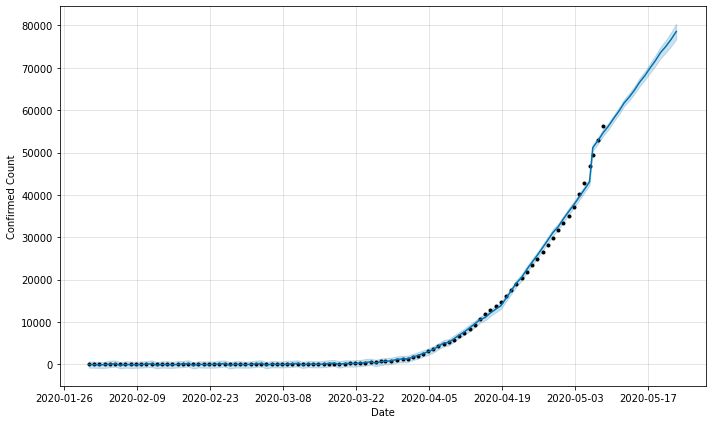

In [19]:
lt = model.plot(pred,xlabel='Date',ylabel='Confirmed Count')